In [5]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score




In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
train_rois = pd.read_csv(r"C:\Users\chemm\OneDrive\Bureau\cours\MOSEF\Machine Learning\brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024\data\train_rois.csv")
train_participants = pd.read_csv(r"C:\Users\chemm\OneDrive\Bureau\cours\MOSEF\Machine Learning\brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024\data\train_participants.csv")
train_merged = pd.merge(train_participants, train_rois, on="participant_id")


In [10]:
columns_list = list(train_rois.columns)
print(columns_list)


['participant_id', 'session', 'run', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_GM_Vol', 'rThaPro_GM_Vol', 'lVenVen_GM_Vol', 'rVenVen_GM_Vol', 'lOC_GM_Vol', 'rOC_GM_Vol', 'lCbeLoCbe1-5_GM_Vol', 'rCbeLoCbe1-5_GM_Vol', 'lCbeLoCbe6-7_GM_Vol', 'rCbeLoCbe6-7_GM_Vol', 'lCbeLoCbe8-10_GM_Vol', 'rCbeLoCbe8-10_GM_Vol', 'lBasCbr+FobBr_GM_Vol', 'rBasCbr+FobBr_GM_Vol', 'lAntCinGy_GM_Vol', 'rAntCinGy_GM_Vol', 'lAntIns_GM_Vol', 'rAntIns_GM_Vol', 'lAntOrbGy_GM_Vol', 'rAntOrbGy_GM_Vol', 'lAngGy_GM_Vol', 'rAngGy_GM

In [3]:
train_merged.columns()

NameError: name 'train_merged' is not defined

In [13]:
print("Colonnes disponibles :", train_merged.columns)

Colonnes disponibles : Index(['participant_id', 'session_x', 'sex', 'age', 'diagnosis', 'study',
       'site', 'TIV_x', 'CSF_Vol_x', 'GM_Vol_x',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=301)


In [14]:
print("Répartition des diagnostics :", train_merged['diagnosis'].value_counts())

Répartition des diagnostics : diagnosis
control          222
schizophrenia    188
Name: count, dtype: int64


In [18]:
roi_columns = [col for col in train_merged.columns if '_GM_Vol' in col or '_CSF_Vol' in col]
roi_means = train_merged.groupby("diagnosis")[roi_columns].mean()
print("Moyennes des ROIs par diagnostic :", roi_means)


Moyennes des ROIs par diagnostic :                l3thVen_GM_Vol  r3thVen_GM_Vol  l4thVen_GM_Vol  r4thVen_GM_Vol  \
diagnosis                                                                       
control              0.073607        0.058046        0.059726        0.062571   
schizophrenia        0.061790        0.051317        0.060671        0.064534   

               lAcc_GM_Vol  rAcc_GM_Vol  lAmy_GM_Vol  rAmy_GM_Vol  \
diagnosis                                                           
control           0.450283     0.449111     0.955355     0.932661   
schizophrenia     0.436330     0.435150     0.901777     0.882166   

               lBst_GM_Vol  rBst_GM_Vol  lCau_GM_Vol  rCau_GM_Vol  \
diagnosis                                                           
control           0.399111     0.418761     2.948128     3.044341   
schizophrenia     0.402580     0.434774     2.899621     2.986346   

               lExtCbe_GM_Vol  rExtCbe_GM_Vol  lCbeWM_GM_Vol  rCbeWM_GM_Vol  \
diagnos

In [19]:

roi_diff = (roi_means.loc["schizophrenia"] - roi_means.loc["control"]).abs()
roi_diff_sorted = roi_diff.sort_values(ascending=False)
print("ROIs les plus discriminants :", roi_diff_sorted.head(10))


ROIs les plus discriminants : lMidFroGy_GM_Vol     1.530541
lExtCbe_GM_Vol       1.514026
rExtCbe_GM_Vol       1.427939
rMidFroGy_GM_Vol     1.346878
lMidTemGy_GM_Vol     1.224960
rMidTemGy_GM_Vol     1.189929
lMidFroGy_CSF_Vol    0.962904
rMidFroGy_CSF_Vol    0.914564
rSupFroGy_GM_Vol     0.904885
lSupFroGy_GM_Vol     0.877571
dtype: float64


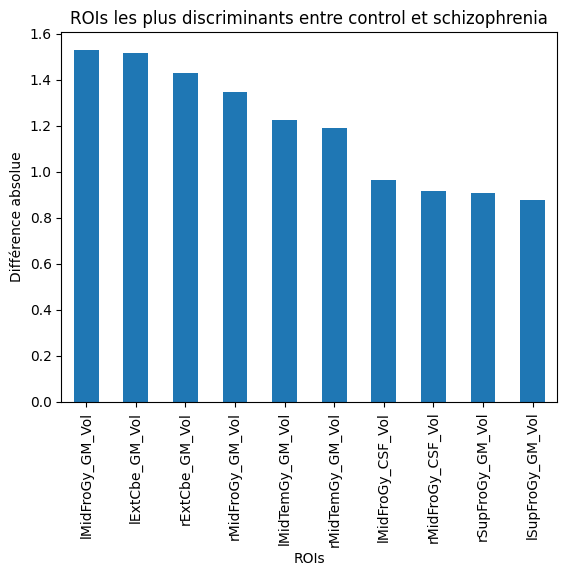

In [20]:

# Visualisation des ROIs les plus discriminants
top_rois = roi_diff_sorted.head(10).index
roi_diff_sorted.head(10).plot(kind="bar")
plt.title("ROIs les plus discriminants entre control et schizophrenia")
plt.xlabel("ROIs")
plt.ylabel("Différence absolue")
plt.show()


In [25]:
# Ajouter les 10 ROIs les plus discriminants aux variables explicatives
top_rois = ['lMidFroGy_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 
            'rMidFroGy_GM_Vol', 'lMidTemGy_GM_Vol', 'rMidTemGy_GM_Vol', 
            'lMidFroGy_CSF_Vol', 'rMidFroGy_CSF_Vol', 'rSupFroGy_GM_Vol', 
            'lSupFroGy_GM_Vol']

# Sélection des variables explicatives
X = train_merged[['age', 'TIV_x', 'CSF_Vol_x', 'GM_Vol_x', 'WM_Vol_x'] + top_rois]
y = (train_merged['diagnosis'] == 'schizophrenia').astype(int)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modélisation avec Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Évaluation du modèle
y_pred = model.predict_proba(X_test)[:, 1]
print("ROC-AUC après ajout des ROIs :", roc_auc_score(y_test, y_pred))


ROC-AUC après ajout des ROIs : 0.7393750000000001


In [26]:
X_rois = train_merged[top_rois]
y = (train_merged['diagnosis'] == 'schizophrenia').astype(int)

X_train_rois, X_test_rois, y_train_rois, y_test_rois = train_test_split(X_rois, y, test_size=0.2, random_state=42)

model_rois = RandomForestClassifier(random_state=42)
model_rois.fit(X_train_rois, y_train_rois)

y_pred_rois = model_rois.predict_proba(X_test_rois)[:, 1]
print("ROC-AUC avec ROIs seuls :", roc_auc_score(y_test_rois, y_pred_rois))


ROC-AUC avec ROIs seuls : 0.680625


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict_proba(X_test)[:, 1]
print("ROC-AUC après optimisation :", roc_auc_score(y_test, y_pred_best))


ROC-AUC après optimisation : 0.7393750000000001


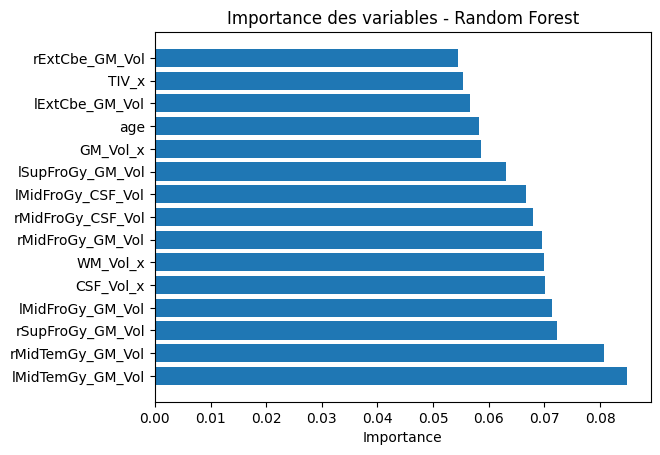

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Importance des variables - Random Forest')
plt.xlabel('Importance')
plt.show()
